# Phân tích và trực quan hóa dữ liệu

## Thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Đọc dữ liệu

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
y = df['Attrition']

col_int32 = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
col_int16 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ép kiểu
X[col_int32] = X[col_int32].astype('int32')
X[col_int16] = X[col_int16].astype('int16')

X_origin = X.copy()
y_origin = y.copy()

# One-hot cho các cột nominal
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
    drop='first'
)

encode_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

X_encoded_df = pd.DataFrame(
    X_encoded_array, 
    columns=encoded_columns,
    index=X_origin.index
)

# Gộp data sau one-hot
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

# Encode y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_origin)

# Continuous columns cần scale
continuous_data = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Standard Scaler
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(
    scaler.fit_transform(X_encode[continuous_data]),
    columns=continuous_data,
    index=X_encode.index
).astype('float32')

# Gộp cùng dữ liệu còn lại
X_final = pd.concat(
    [
        X_encode.drop(columns=continuous_data), 
        X_scaled_df                       
    ],
    axis=1
)

# One-hot columns cũng ép về float32
one_hot_cols = X_encoded_df.columns
X_final[one_hot_cols] = X_final[one_hot_cols].astype('float32')

X = X_final


In [3]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

## Phân tích các tham số thống kê của dữ liệu

In [4]:
print("Kích thước dữ liệu:", df.shape)
print("\nThông tin dữ liệu:")
print(df.info())
print("\nThống kê mô tả:")
print(df.describe(include='all'))
print("\nGiá trị thiếu:")
print(df.isnull().sum())


Kích thước dữ liệu: (1470, 35)

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1

### Chi tiết về khái niệm của các trường:

| STT | Thuộc tính                 | Loại dữ liệu | Định nghĩa thuộc tính                      | Mô tả thuộc tính                                                                 |
| --- | -------------------------- | ------------ | ------------------------------------------ | -------------------------------------------------------------------------------- |
| 1   | Age                        | Số nguyên    | Tuổi                                       |                                                                                  |
| 2   | Attrition                  | Phân loại    | Quyết định nghỉ việc                       | Yes / No                                                                         |
| 3   | Business travel            | Phân loại    | Mức độ đi công tác                         | Non_Travel / Travel_Rarely / Travel_Frequently                                   |
| 4   | Daily rate                 | Số nguyên    | Mức lương theo ngày                        |                                                                                  |
| 5   | Department                 | Phân loại    | Phòng ban làm việc                         | Human Resources / Research & Development / Sales                                 |
| 6   | Distance from home         | Số nguyên    | Khoảng cách giữa nơi làm việc và nhà       |                                                                                  |
| 7   | Education                  | Phân loại    | Trình độ giáo dục                          | 1. Below College<br>2. College<br>3. Bachelor<br>4. Master<br>5. Doctor          |
| 8   | Education field            | Phân loại    | Lĩnh vực giáo dục                          | Human Resources / Life Sciences / Medical / Marketing / Technical Degree / Other |
| 9   | Employee count             | Số nguyên    | Số lượng nhân viên                         |                                                                                  |
| 10  | Employee number            | Số nguyên    | Mã số nhân viên                            |                                                                                  |
| 11  | Environment satisfaction   | Phân loại    | Mức độ hài lòng về môi trường làm việc     | 1. Low<br>2. Medium<br>3. High<br>4. Very High                                   |
| 12  | Gender                     | Phân loại    | Giới tính                                  | Male / Female                                                                    |
| 13  | Hourly rate                | Số nguyên    | Mức lương theo giờ                         |                                                                                  |
| 14  | Job involvement            | Phân loại    | Mức độ tham gia vào công việc              | 1. Low<br>2. Medium<br>3. High<br>4. Very High                                   |
| 15  | Job level                  | Phân loại    | Cấp bậc công việc                          |                                                                                  |
| 16  | Job role                   | Phân loại    | Lĩnh vực làm việc                          | Sales Executive / Research Scientist / Others                                    |
| 17  | Job satisfaction           | Phân loại    | Mức độ hài lòng về công việc               | 1. Low<br>2. Medium<br>3. High<br>4. Very High                                   |
| 18  | Marital status             | Phân loại    | Tình trạng hôn nhân                        | Divorced / Single / Married                                                      |
| 19  | Monthly income             | Số nguyên    | Thu nhập hàng tháng                        |                                                                                  |
| 20  | Monthly rate               | Số nguyên    | Mức lương theo tháng                       |                                                                                  |
| 21  | Number of company workers  | Số nguyên    | Số lượng công ty đã làm trước đây          |                                                                                  |
| 22  | Over 18                    | Phân loại    | Trên 18 tuổi                               | Yes                                                                              |
| 23  | Overtime                   | Phân loại    | Tăng ca                                    | No / Yes                                                                         |
| 24  | Percent salary hike        | Số nguyên    | Tỷ lệ thay đổi trong mức lương             |                                                                                  |
| 25  | Performance rating         | Phân loại    | Mức độ hoàn thành công việc                | 1. Low<br>2. Medium<br>3. High<br>4. Very High                                   |
| 26  | Relationship satisfaction  | Phân loại    | Mức độ hài lòng về mối quan hệ             | 1. Low<br>2. Medium<br>3. High<br>4. Very High                                   |
| 27  | Standard hours             | Số nguyên    | Giờ làm việc tiêu chuẩn                    |                                                                                  |
| 28  | Stock option level         | Phân loại    | Mức cổ phần nhân viên giữ                  |                                                                                  |
| 29  | Total working years        | Số nguyên    | Tổng số năm làm việc                       |                                                                                  |
| 30  | Training times last year   | Số nguyên    | Số lần đào tạo trong năm                   |                                                                                  |
| 31  | Work-life balance          | Phân loại    | Mức độ cân bằng giữa làm việc và cuộc sống | 1. Bad<br>2. Good<br>3. Better<br>4. Best                                        |
| 32  | Years at company           | Số nguyên    | Số năm làm việc tại công ty                |                                                                                  |
| 33  | Years in current role      | Số nguyên    | Số năm làm việc ở vị trí hiện tại          |                                                                                  |
| 34  | Years since last promotion | Số nguyên    | Số năm làm việc kể từ khi thăng chức       |                                                                                  |
| 35  | Years with current manager | Số nguyên    | Số năm làm việc với quản lý hiện tại       |                                                                                  |


**Thống kê tổng thể**

In [5]:
df.describe(include='all')

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction  \
count          1470.0     1470.000000  ...               1470.000000   
unique            NaN             NaN  ...                       NaN   
top               NaN             NaN  ...                       NaN   
freq              NaN             NaN  ...                       NaN   
mean              1.0     1024.865306  ...                  2.712245   
std               0.0      602.024335  ...                  1.081209   
min               1.0        1.000000  ...                  1.000000   
25%               1.0      491.250000  ...                  2.000000   
50%               1.0     1020.500000  ...                  3.000000   
75%               1.0     1555.750000  ...                  4.000000   
max               1.0     2068.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
unique           NaN               NaN                NaN   
top              NaN               NaN                NaN   
freq             NaN               NaN                NaN   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

        TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
count             1470.000000     1470.000000     1470.000000   
unique                    NaN             NaN             NaN   
top                       NaN             NaN             NaN   
freq                      NaN             NaN             NaN   
mean                 2.799320        2.761224        7.008163   
std                  1.289271        0.706476        6.126525   
min                  0.000000        1.000000        0.000000   
25%                  2.000000        2.000000        3.000000   
50%                  3.000000        3.000000        5.000000   
75%                  3.000000        3.000000        9.000000   
max      

### Biều đồ phát hiện giá trị ngoại lai

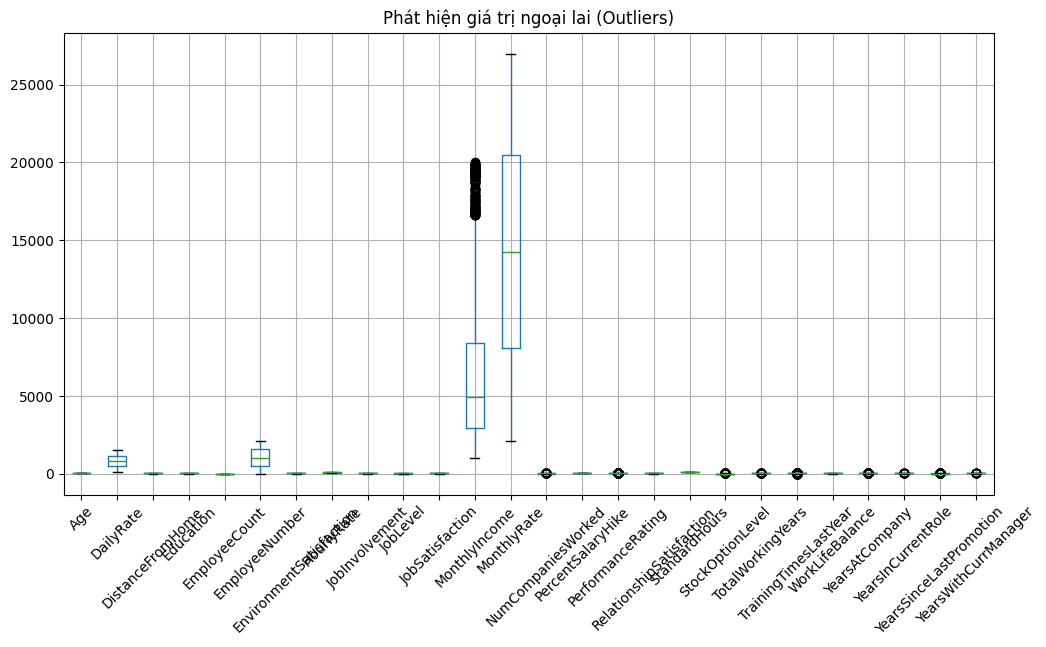

In [6]:
plt.figure(figsize=(12, 6))
df.select_dtypes('number').boxplot()
plt.title("Phát hiện giá trị ngoại lai (Outliers)")
plt.xticks(rotation=45)
plt.show()

In [7]:
# Dữ liệu liên tục
continous_data = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'EmployeeCount',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'StandardHours',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Dữ liệu phân loại
classified_data = [
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'EnvironmentSatisfaction',
    'Gender',
    'JobInvolvement',
    'JobLevel',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'Over18',
    'OverTime',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

### Biểu đồ thống kê với dữ liệu rời rạc (Categories)

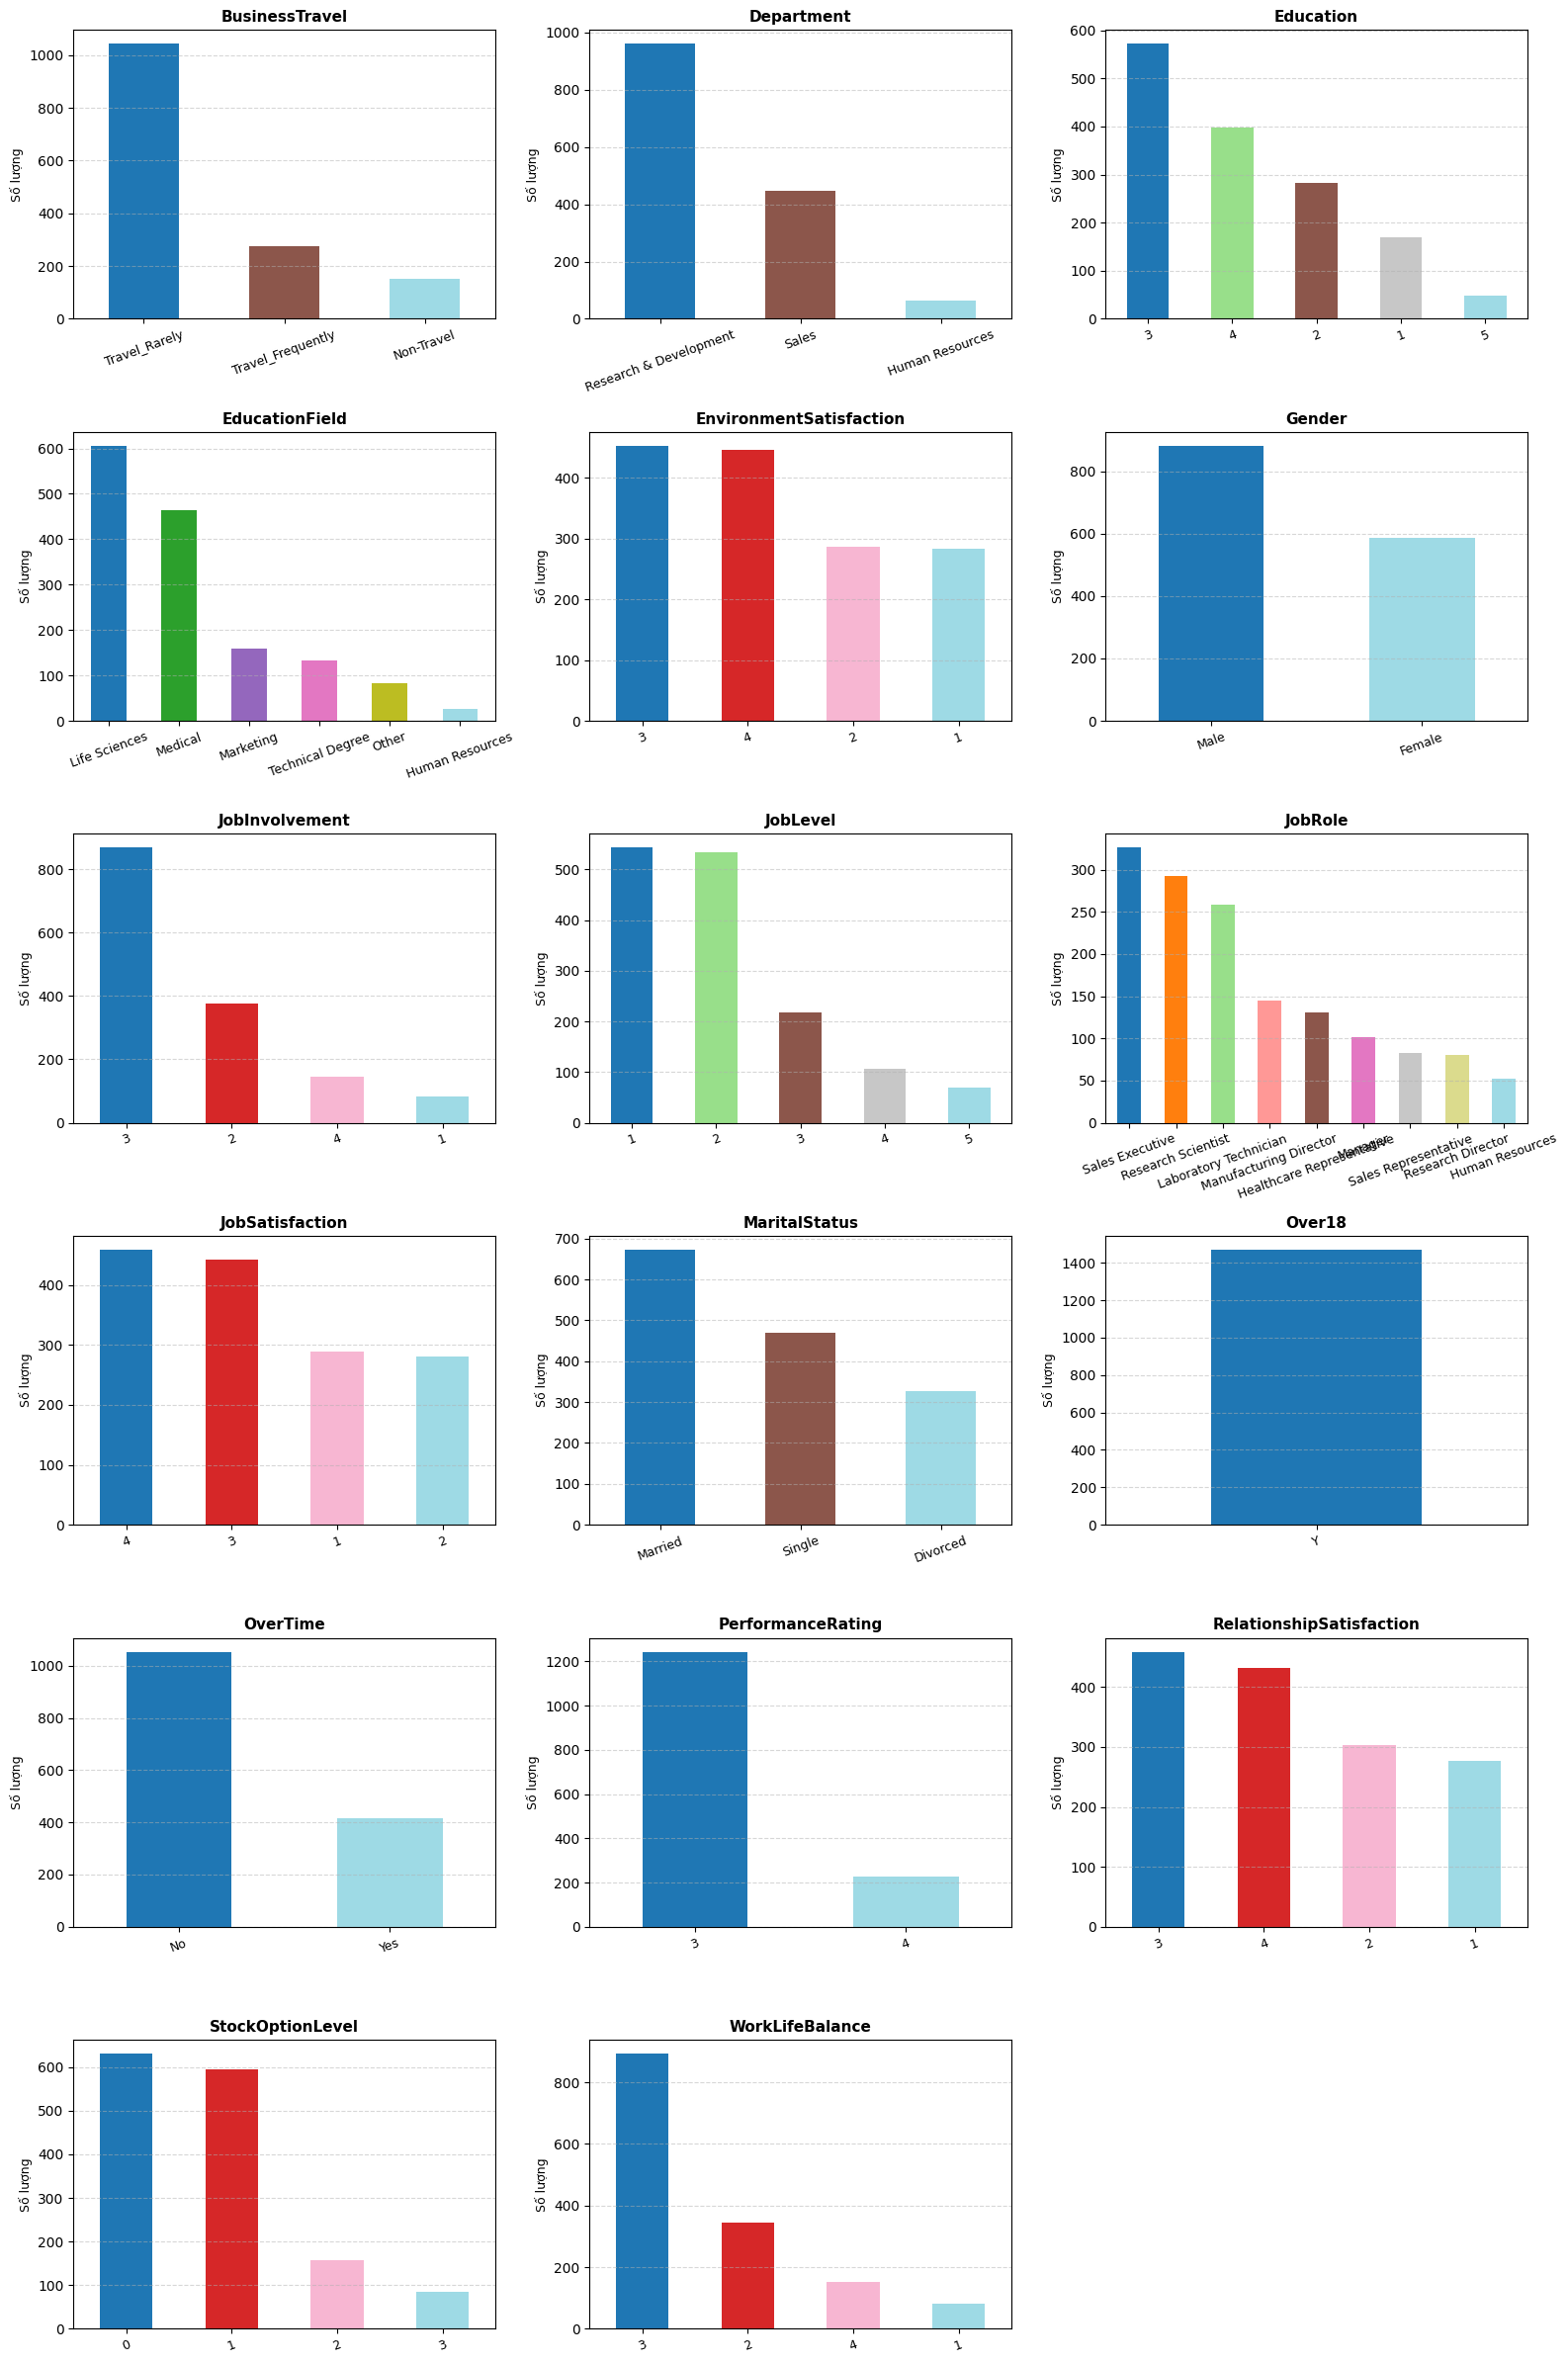

In [8]:
import math
cols_per_row = 3
rows = math.ceil(len(classified_data) / cols_per_row)
plt.figure(figsize=(16, 4 * rows))
for i, col in enumerate(classified_data, 1):
    plt.subplot(rows, cols_per_row, i)

    # Lấy dữ liệu và màu sắc ngẫu nhiên
    colors = plt.cm.tab20(np.linspace(0, 1, len(df[col].value_counts())))

    df[col].value_counts().plot(kind='bar', color=colors)

    plt.title(f"{col}", fontsize=11, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("Số lượng", fontsize=9)
    plt.xticks(rotation=20, fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()




### Biểu đồ thống kê với dữ liệu liên tục

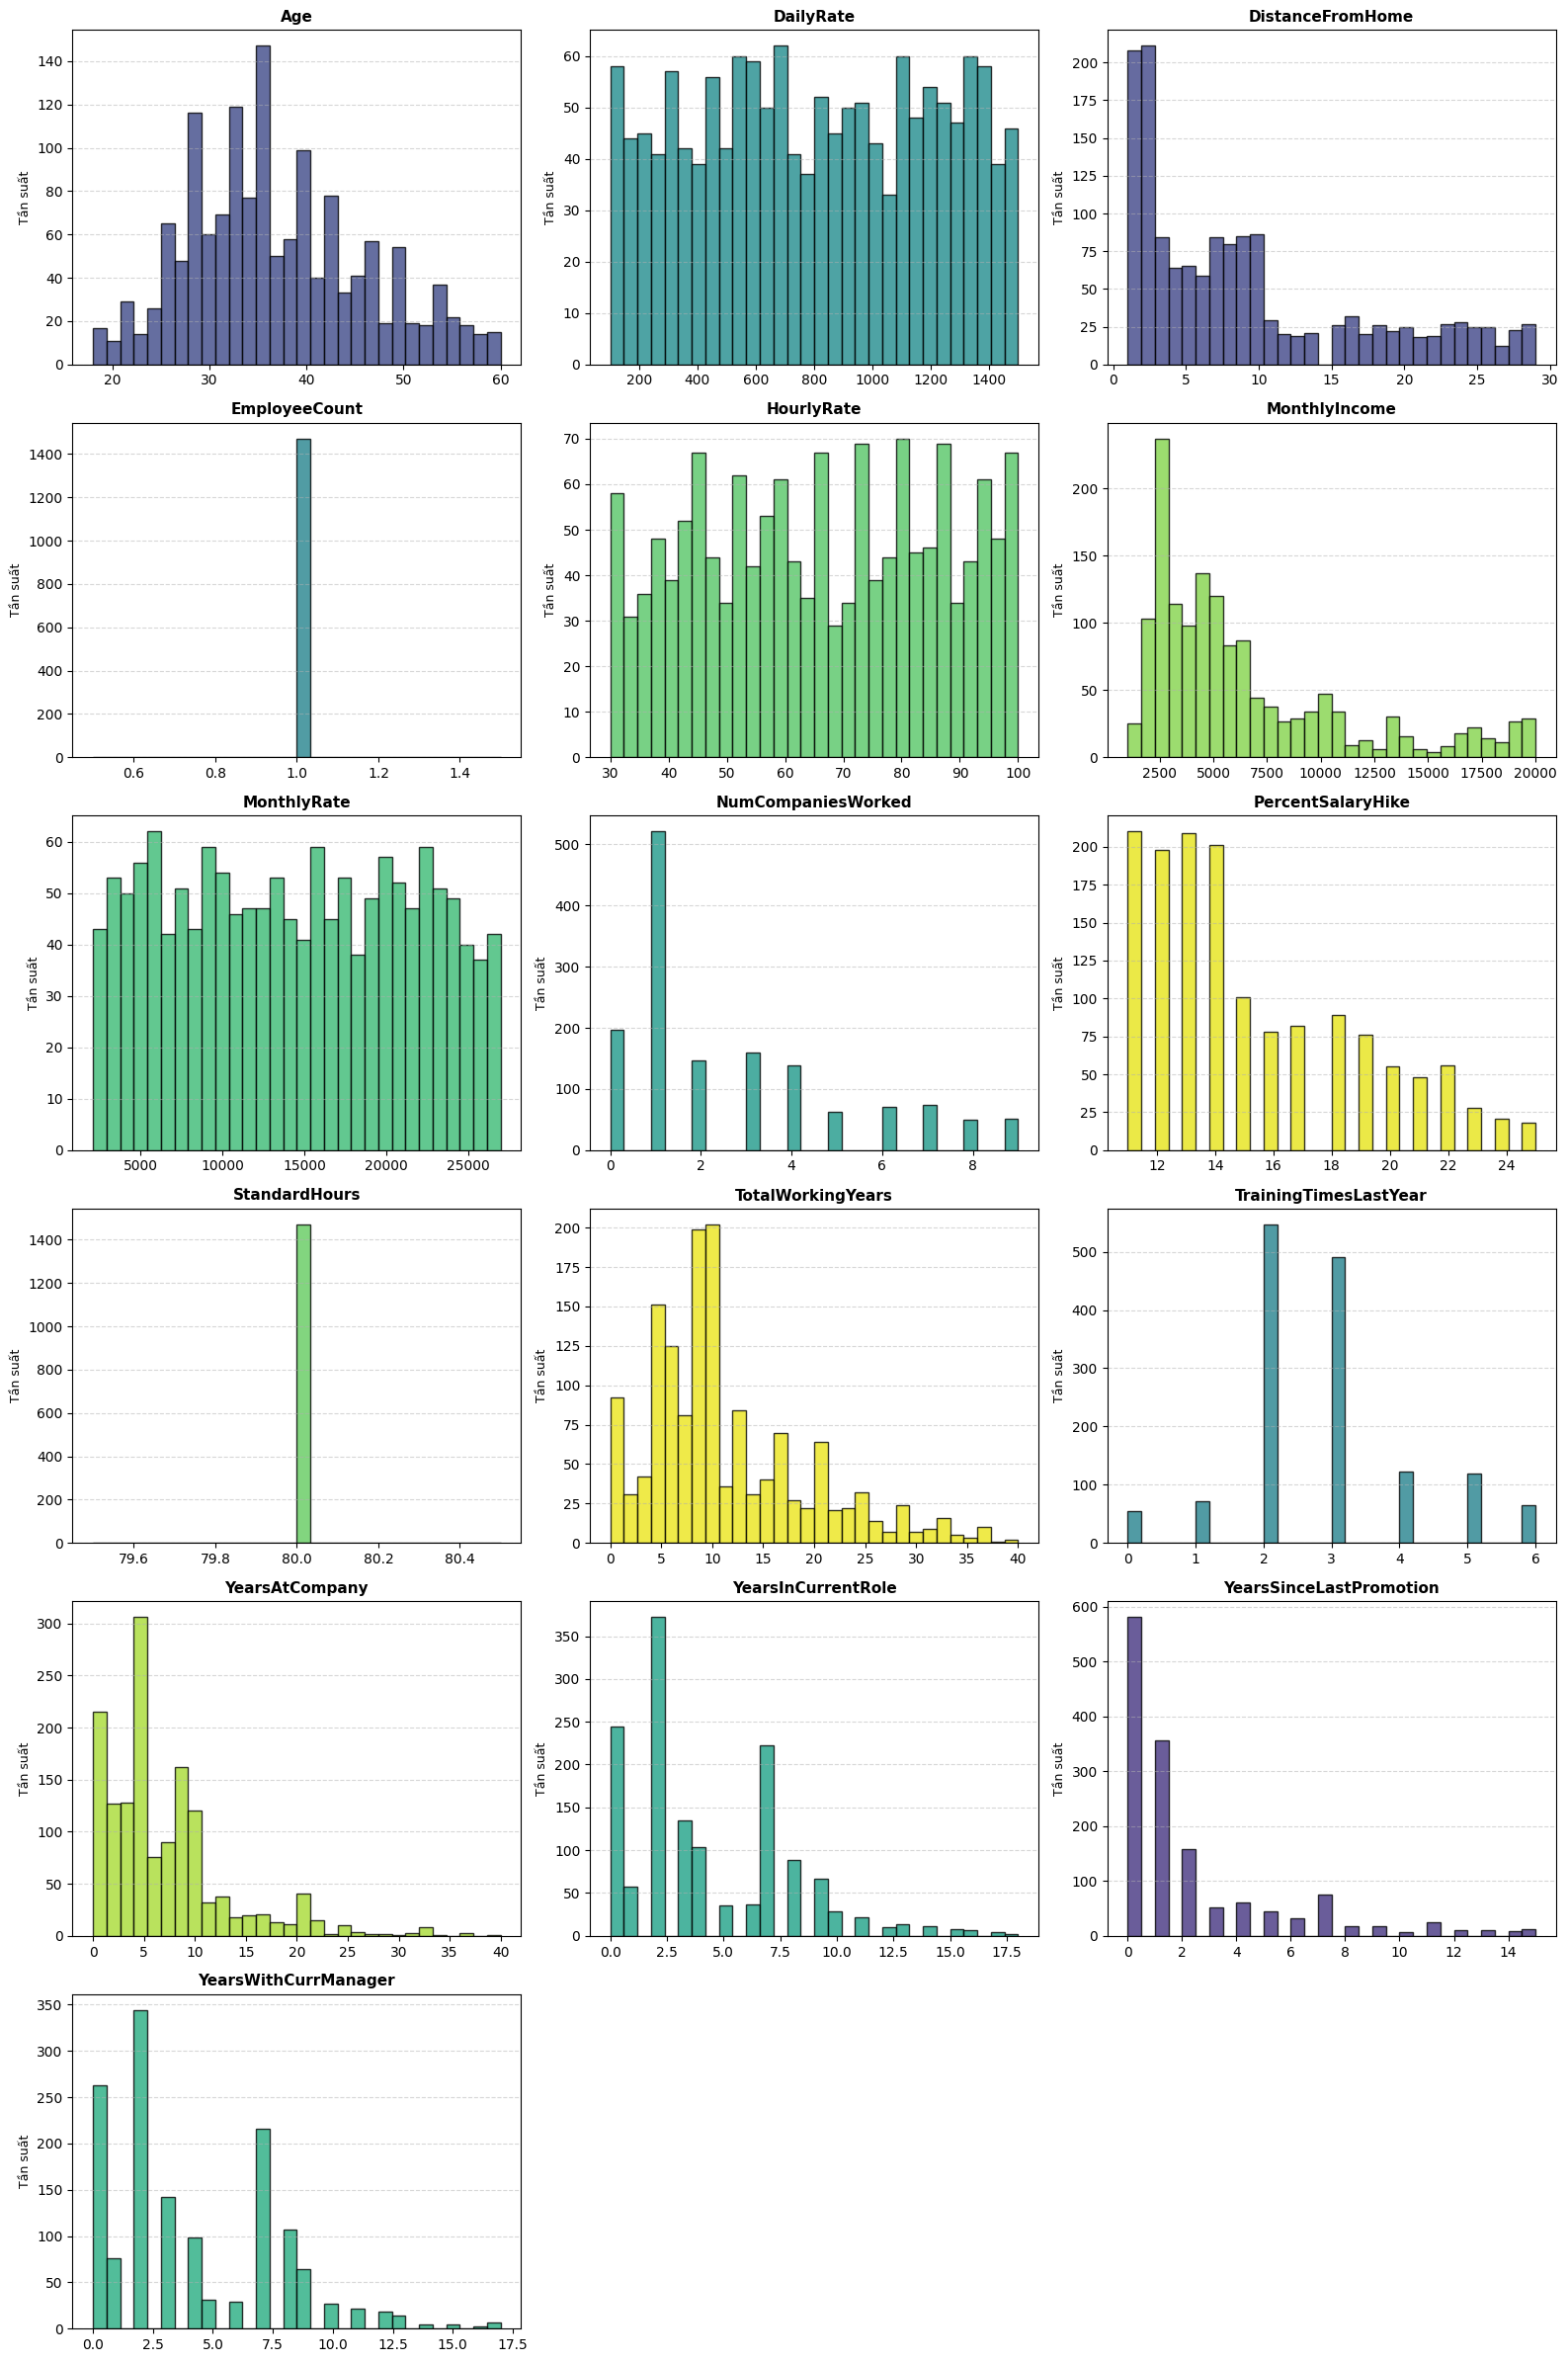

In [9]:
continuous_data = continous_data.copy()

cols_per_row = 3
rows = math.ceil(len(continuous_data) / cols_per_row)

plt.figure(figsize=(16, 4 * rows))

# Vẽ histogram cho từng biến
for i, col in enumerate(continuous_data, 1):
    plt.subplot(rows, cols_per_row, i)
    
    # Chọn màu tự động từ colormap
    color = plt.cm.viridis(np.random.rand())
    
    plt.hist(df[col].dropna(), bins=30, color=color, edgecolor='black', alpha=0.8)
    plt.title(f"{col}", fontsize=11, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("Tần suất", fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
plt.tight_layout()
plt.show()


### Ma trận hệ số tương quan

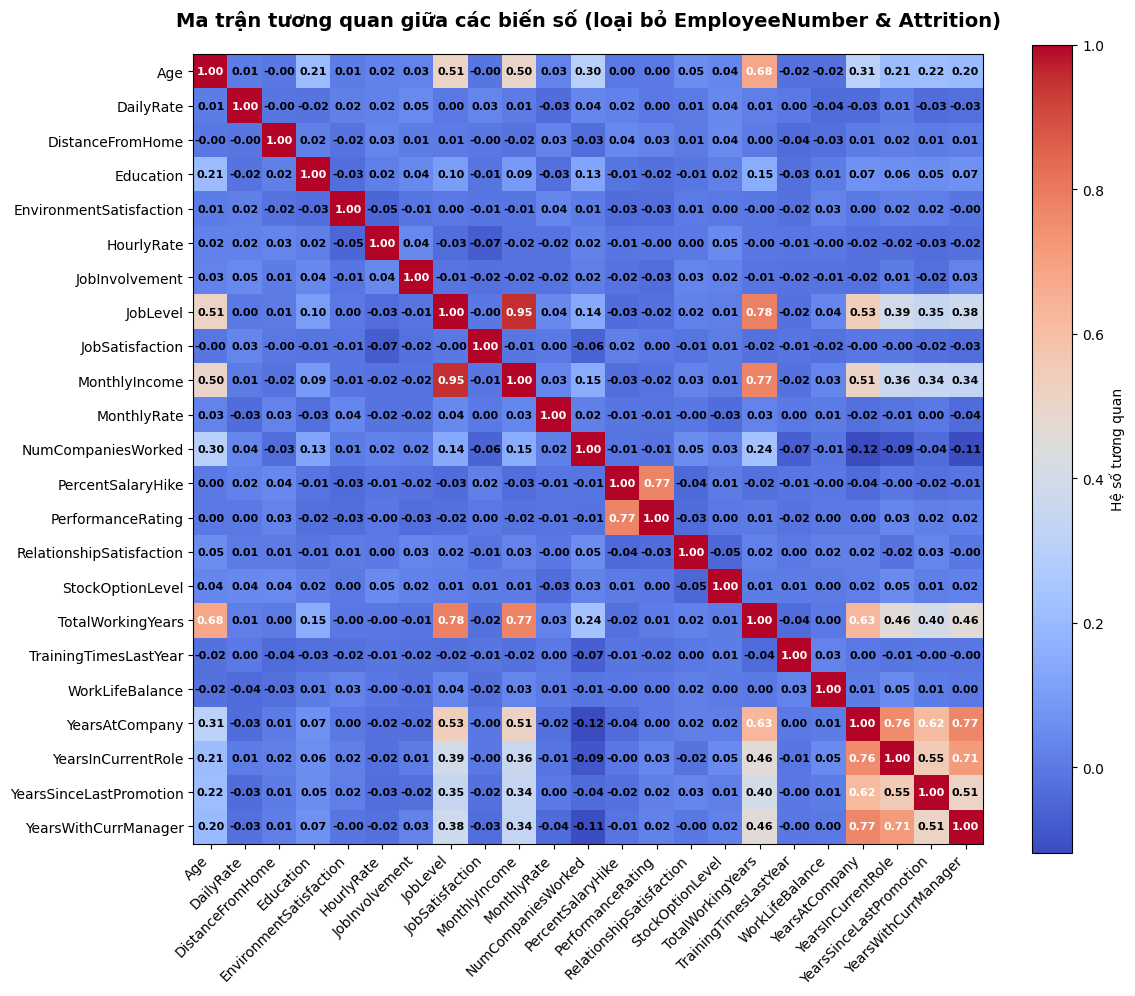

In [10]:
import matplotlib.pyplot as plt

cols_to_drop = ['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours']
corr = df.drop(columns=cols_to_drop, errors='ignore').corr(numeric_only=True)

# Vẽ biểu đồ
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Hệ số tương quan')

# Nhãn trục
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=10)
plt.title("Ma trận tương quan giữa các biến số (loại bỏ EmployeeNumber & Attrition)",
          fontsize=14, fontweight='bold', pad=20)

# Hiển thị giá trị hệ số
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = f"{corr.iloc[i, j]:.2f}"
        plt.text(j, i, text,
                 ha='center', va='center',
                 color='black' if abs(corr.iloc[i, j]) < 0.6 else 'white',
                 fontsize=8, fontweight='bold')

plt.grid(False)
plt.tight_layout()
plt.show()


## Chuẩn hóa dữ liệu và đánh giá các thành phần chính (của dữ liệu gốc hoặc sau khi phân thích thành phần chính) theo các tham số thống kê.

**Chuẩn hóa dữ liệu**

In [11]:
X

Education  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0             2                        2               3         2   
1             1                        3               2         2   
2             2                        4               2         1   
3             4                        4               3         1   
4             1                        1               3         1   
...         ...                      ...             ...       ...   
1465          2                        3               4         2   
1466          1                        4               2         3   
1467          3                        2               4         2   
1468          3                        4               2         2   
1469          3                        2               4         2   

      JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
0                   4                  3                         1   
1                   2                  4                         4   
2                   3                  3                         2   
3                   3                  3                         3   
4                   2                  3                         4   
...               ...                ...                       ...   
1465                4                  3                         3   
1466                1                  3                         1   
1467                2                  4                         2   
1468                2                  3                         4   
1469                3                  3                         1   

      StockOptionLevel  WorkLifeBalance  BusinessTravel_Travel_Frequently  \
0                    0                1                               0.0   
1                    1                3                               1.0   
2                    0                3                               0.0   
3                    0                3                               1.0   
4                    1                3                               0.0   
...                ...              ...                               ...   
1465                 1                3                               1.0   
1466                 1                3                               0.0   
1467                 1                3                               0.0   
1468                 0                2                               1.0   
1469                 0                4                               0.0   

      ...  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0     ...      -0.108350     0.726020            2.125136          -1.150554   
1     ...      -0.291719     1.488876           -0.678049           2.129306   
2     ...      -0.937654    -1.674841            1.324226          -0.057267   
3     ...      -0.763634     1.243211           -0.678049          -1.150554   
4     ...      -0.644858     0.325900            2.525591          -0.877232   
...   ...            ...          ...                 ...                ...   
1465  ...      -0.835451    -0.284329            0.523316           0.489376   
1466  ...       0.741140     1.004010            0.523316          -0.057267   
1467  ...      -0.076690    -1.284418           -0.678049           1.309341   
1468  ...      -0.236474    -0.150393           -0.277594          -0.330589   
1469  ...      -0.445978    -0.574124           -0.277594          -0.877232   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0             -0.421642              -2.171982       -0.164613   
1             -0.164511               0.155707        0.488508   
2             -0.550208               0.155707       -1.144294   
3             -0.421642               0.155707        0.161947   
4             -0.678774               0.155707       -0.817734   
...                 ...                   

**Thực hiện giảm còn 6 chiều**

In [12]:
from sklearn.decomposition import PCA

# giảm còn 6 chiều
pca = PCA(n_components = 6)

X_pca = pca.fit_transform(X)

# hiển thị dưới dạng dataframe
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(6)])


In [13]:
X_pca_df

PC1       PC2       PC3       PC4       PC5       PC6
0    -0.291919  1.230032  0.850918 -0.842971 -0.672223 -0.148299
1     0.527992 -0.880787 -0.194453  0.646848  0.232339 -0.328753
2    -2.518352  1.179963  0.221287  0.630399 -0.819927  0.780013
3    -0.973054 -0.636103  0.534510  1.647147 -0.112924  0.623274
4    -1.968193  0.695868 -0.935288  0.418193  1.800786 -1.343907
...        ...       ...       ...       ...       ...       ...
1465 -0.767285  0.408933  1.420250 -0.017247  0.352674  0.878247
1466  0.906078 -0.299583 -0.216601  1.340345 -2.334926 -2.420873
1467 -1.190915 -0.260301 -0.991970 -1.489234 -0.784442  0.321757
1468  1.024112  0.067031 -0.488606  1.703802  0.441979  0.434333
1469 -1.210093 -0.068752 -0.127337 -1.105891 -0.652926 -0.908902

[1470 rows x 6 columns]

## Trực quan hóa theo từng cặp của dữ liệu đã giảm chiều sau khi phân tích thành phần chính

/tmp/ipykernel_30103/3840467795.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_colors = plt.cm.get_cmap('viridis')


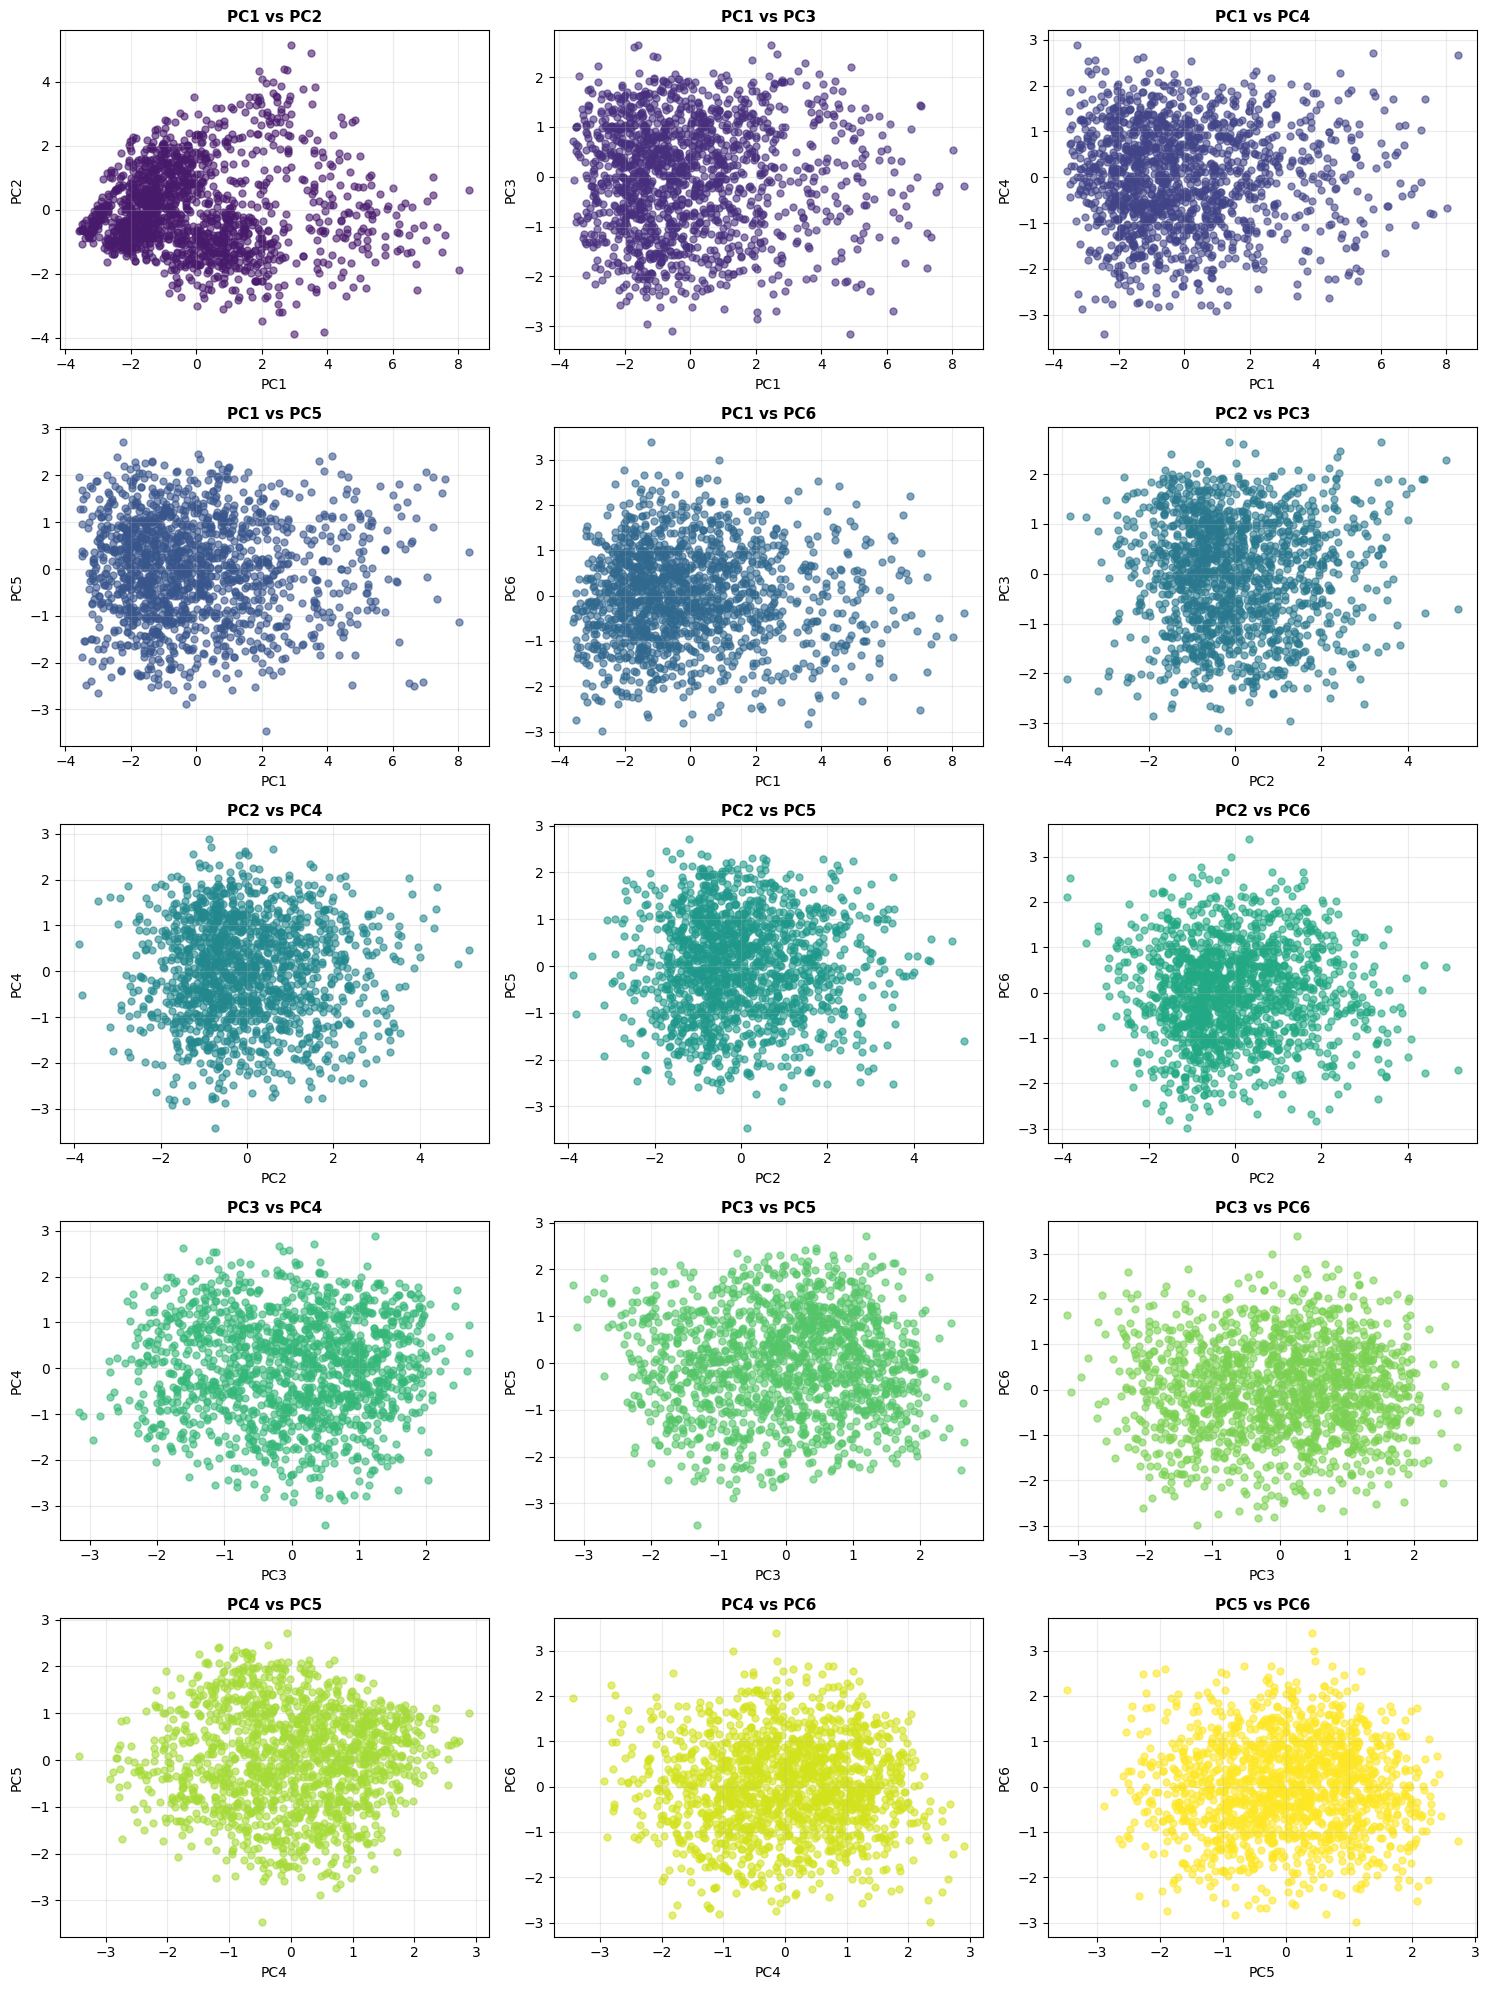

In [14]:
import itertools

def visualize_pairs(X):
    cols = X.columns
    pairs = list(itertools.combinations(cols, 2))
    
    n_cols = 3
    n_rows = int(np.ceil(len(pairs) / n_cols))
    
    plt.figure(figsize=(15, 4 * n_rows))
    cmap_colors = plt.cm.get_cmap('viridis')
    
    for idx, (x_col, y_col) in enumerate(pairs, 1):
        plt.subplot(n_rows, n_cols, idx)
        plt.scatter(X[x_col], X[y_col], alpha=0.6, s=25, color=cmap_colors(idx / len(pairs)))
        plt.xlabel(x_col, fontsize=10)
        plt.ylabel(y_col, fontsize=10)
        plt.title(f"{x_col} vs {y_col}", fontsize=11, fontweight='bold')
        plt.grid(alpha=0.25)
    
    plt.tight_layout()
    plt.show()
visualize_pairs(X_pca_df)


/tmp/ipykernel_30103/399782189.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


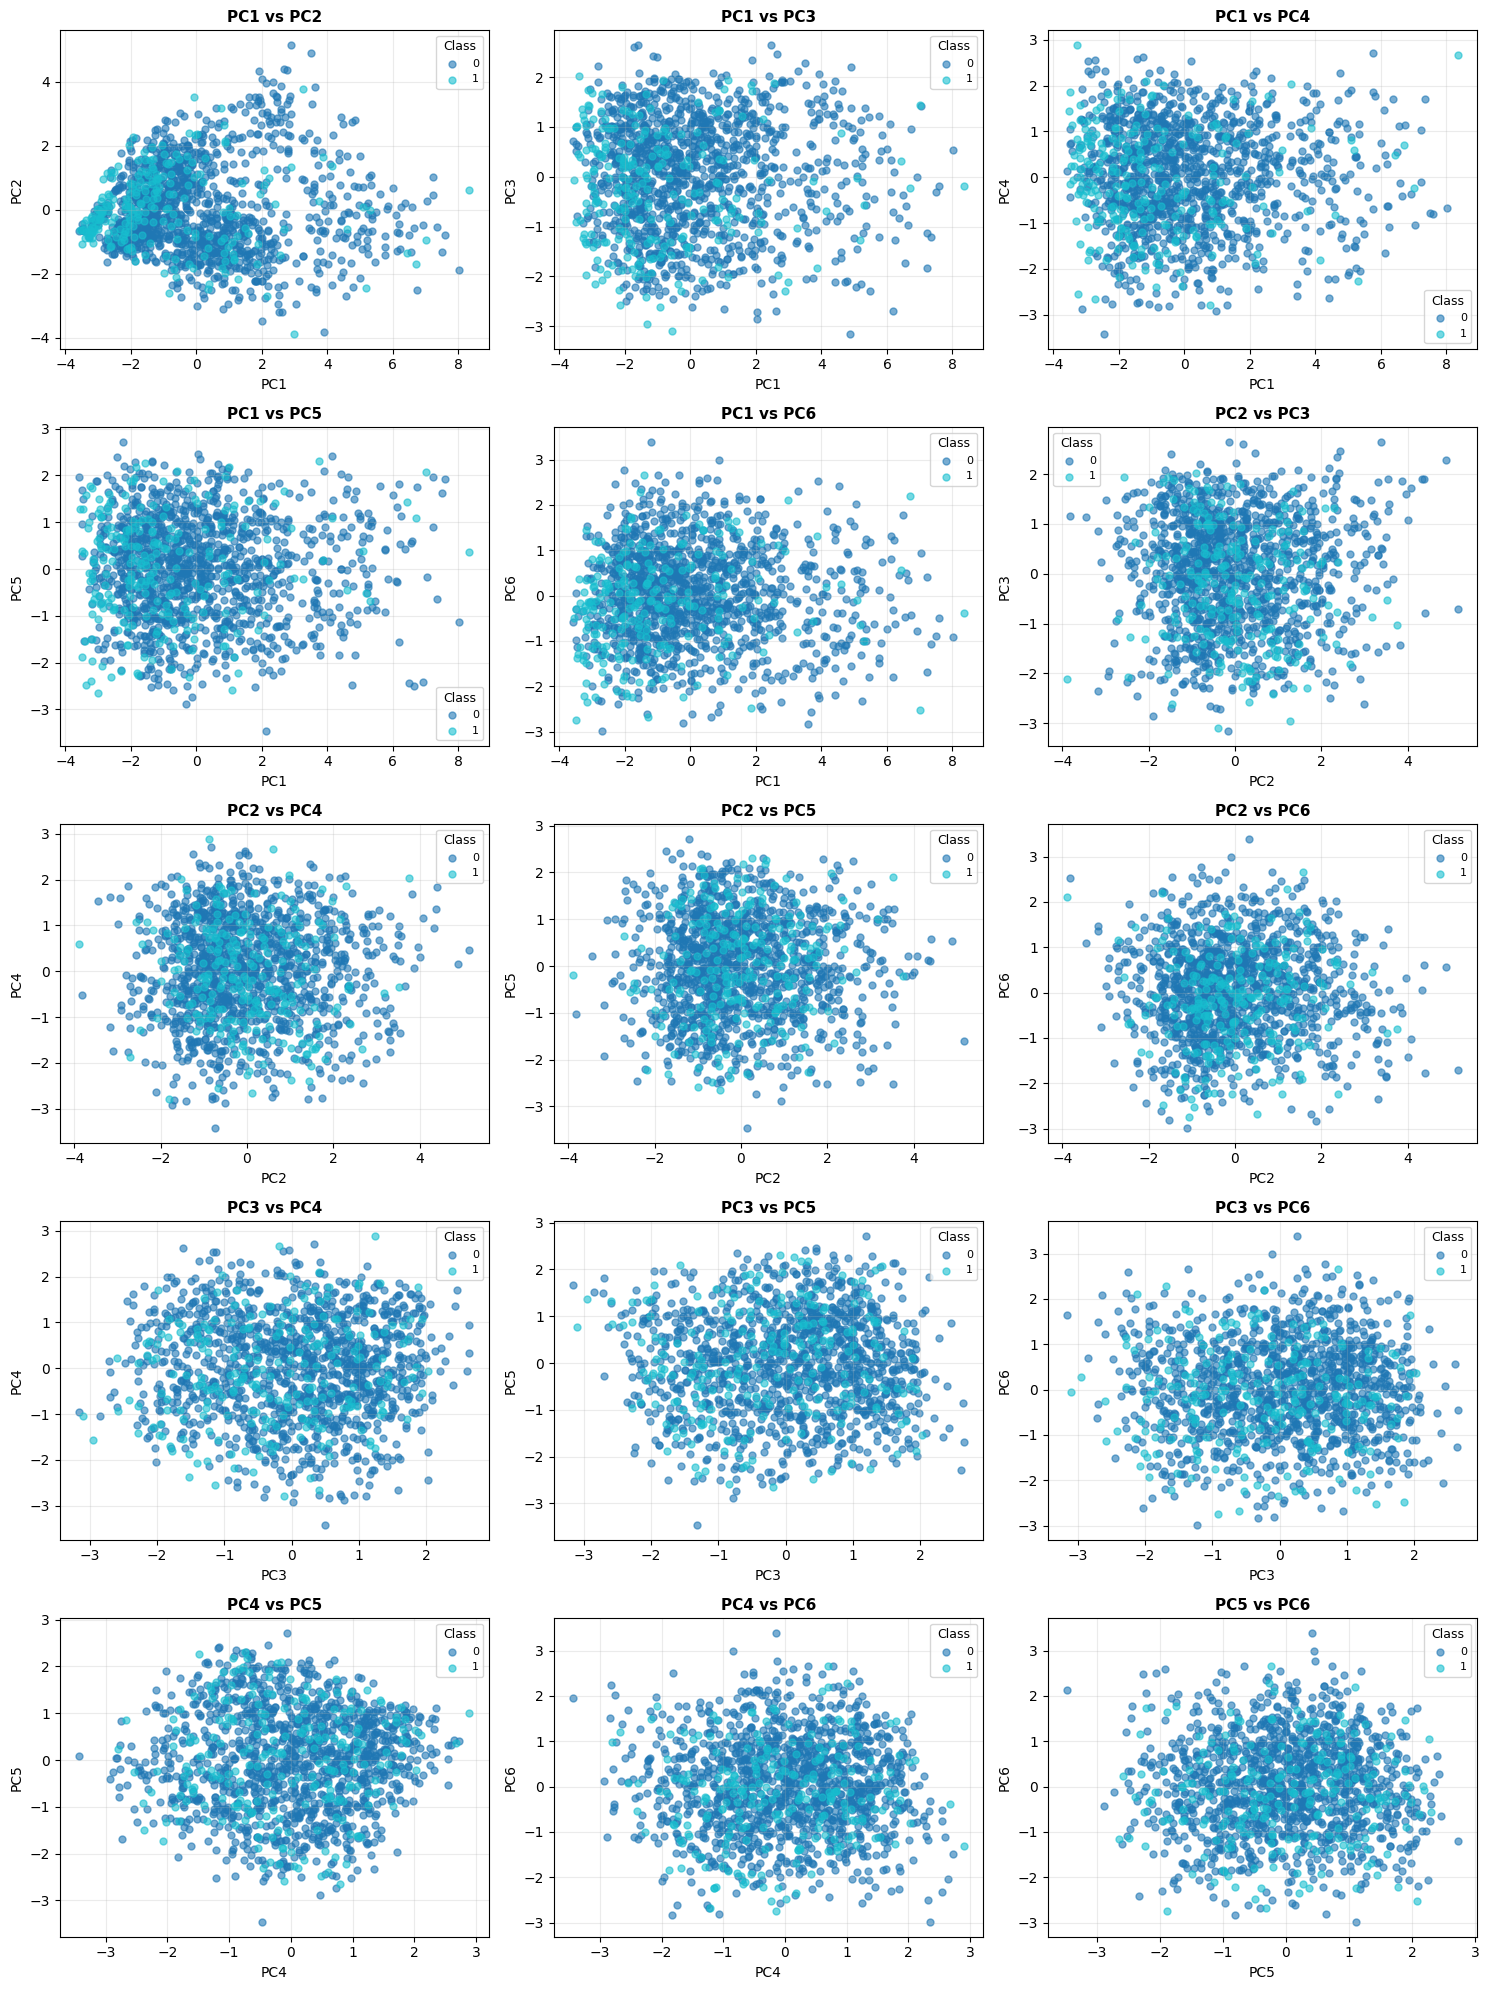

In [15]:
import itertools

def visualize_pairs(X, y=None):
    cols = X.columns
    pairs = list(itertools.combinations(cols, 2))
    
    n_cols = 3
    n_rows = int(np.ceil(len(pairs) / n_cols))
    
    plt.figure(figsize=(15, 4 * n_rows))

    if y is not None:
        classes = np.unique(y)
        colors = plt.cm.get_cmap('tab10', len(classes))
    
    for idx, (x_col, y_col) in enumerate(pairs, 1):
        plt.subplot(n_rows, n_cols, idx)
        
        if y is not None:
            # Vẽ từng class một để có chú thích (legend)
            for i, cls in enumerate(classes):
                mask = (y == cls)
                plt.scatter(
                    X.loc[mask, x_col],
                    X.loc[mask, y_col],
                    alpha=0.6, s=25,
                    color=colors(i),
                    label=str(cls)
                )
            plt.legend(title="Class", fontsize=8, title_fontsize=9)
        else:
            cmap_colors = plt.cm.get_cmap('viridis')
            plt.scatter(X[x_col], X[y_col],
                        alpha=0.6, s=25,
                        color=cmap_colors(idx / len(pairs)))
        
        plt.xlabel(x_col, fontsize=10)
        plt.ylabel(y_col, fontsize=10)
        plt.title(f"{x_col} vs {y_col}", fontsize=11, fontweight='bold')
        plt.grid(alpha=0.25)
    
    plt.tight_layout()
    plt.show()

visualize_pairs(X_pca_df, y)



## Xác định lượng thông tin được bảo tồn

In [16]:
print("Phương sai giải thích của từng thành phần chính:")
print(pca.explained_variance_ratio_)


Phương sai giải thích của từng thành phần chính:
[0.19572313 0.07403427 0.05099598 0.05035623 0.04740622 0.04503683]


In [17]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

for i, var in enumerate(explained_variance): 
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")


PC1: 0.1957 (0.1957 tích lũy)
PC2: 0.0740 (0.2698 tích lũy)
PC3: 0.0510 (0.3208 tích lũy)
PC4: 0.0504 (0.3711 tích lũy)
PC5: 0.0474 (0.4185 tích lũy)
PC6: 0.0450 (0.4636 tích lũy)


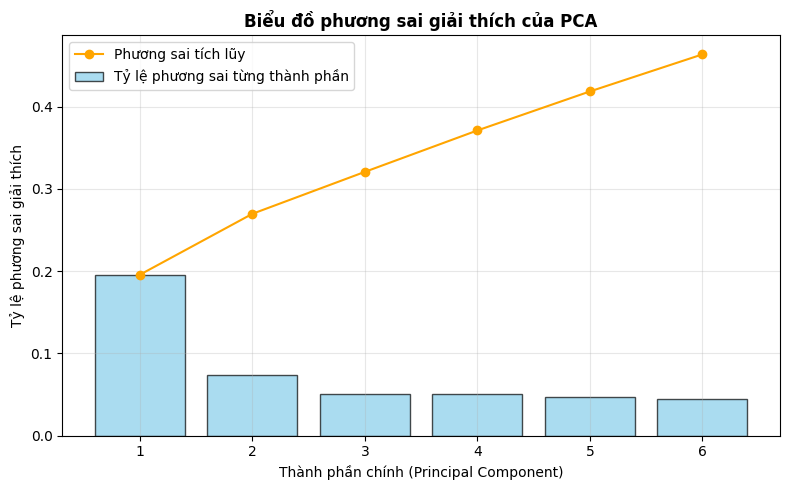

In [18]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, 
        alpha=0.7, color='skyblue', edgecolor='black', label='Tỷ lệ phương sai từng thành phần')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker='o', color='orange', label='Phương sai tích lũy')
plt.xticks(np.arange(1, len(explained_variance)+1))
plt.xlabel('Thành phần chính (Principal Component)')
plt.ylabel('Tỷ lệ phương sai giải thích')
plt.title('Biểu đồ phương sai giải thích của PCA', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Giải thích:

Phương sai tích lũy từ `PC1` đến `PC6` chỉ đạt `~46.36%` tức nó chỉ giữ lại khoảng hơn `40%` dữ liệu quan trọng. Dữ liệu bị phân tán một phần sau khi one hot encode, dữ liệu có nhiều chiều, dẫn đến phương sai bị pha loãng, không thể tập trung. Phần khác là do có nhiều nhiễu của việc dữ liệu nhiều categories nên làm cho PCA kém hiệu quả.

Chính vì tích lũy phương sai thấp, độ giữ lại thông tin thấp, nên chúng tôi thực nghiệm lại với dữ liệu liên tục, không sử dụng dữ liệu dạng categories.

### Thực nghiệm lại đo với dữ liệu liên tục

In [19]:
X_continous_pca_df = df[continous_data]

In [20]:
X_continous_pca_df

Age  DailyRate  DistanceFromHome  EmployeeCount  HourlyRate  \
0      41       1102                 1              1          94   
1      49        279                 8              1          61   
2      37       1373                 2              1          92   
3      33       1392                 3              1          56   
4      27        591                 2              1          40   
...   ...        ...               ...            ...         ...   
1465   36        884                23              1          41   
1466   39        613                 6              1          42   
1467   27        155                 4              1          87   
1468   49       1023                 2              1          63   
1469   34        628                 8              1          82   

      MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0              5993        19479                   8                 11   
1              5130        24907                   1                 23   
2              2090         2396                   6                 15   
3              2909        23159                   1                 11   
4              3468        16632                   9                 12   
...             ...          ...                 ...                ...   
1465           2571        12290                   4                 17   
1466           9991        21457                   4                 15   
1467           6142         5174                   1                 20   
1468           5390        13243                   2                 14   
1469           4404        10228                   2                 12   

      StandardHours  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                80                  8                      0               6   
1                80                 10                      3              10   
2                80                  7                      3               0   
3                80                  8                      3               8   
4                80                  6                      3               2   
...             ...                ...                    ...             ...   
1465             80                 17                      3               5   
1466             80                  9                      5               7   
1467             80                  6                      0               6   
1468             80                 17                      3               9   
1469             80                  6                      3               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                      4                        0                     5  
1                      7                        1                     7  
2                      0                        0                     0  
3                      7                        3                     0  
4                      2                        2                     2  
...                  ...                      ...                   ...  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2  

[1470 rows x 16 columns]

PC1: 0.2869 (0.2869 tích lũy)
PC2: 0.1179 (0.4048 tích lũy)
PC3: 0.0763 (0.4811 tích lũy)
PC4: 0.0752 (0.5563 tích lũy)
PC5: 0.0721 (0.6284 tích lũy)
PC6: 0.0709 (0.6992 tích lũy)


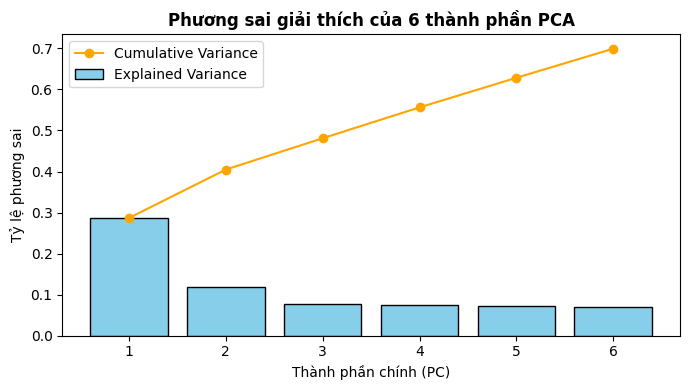

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('pca', PCA(n_components=6))      
])

X_continous_pca = pca_pipeline.fit_transform(df[continous_data])
X_continous_pca_df = pd.DataFrame(X_continous_pca,
                                  columns=[f'PC{i+1}_continous' for i in range(6)])

# Lấy thông tin PCA đã được fit
pca = pca_pipeline.named_steps['pca']

# Tính phương sai giải thích
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

for i, var in enumerate(explained_variance): 
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")

# Vẽ biểu đồ
plt.figure(figsize=(7, 4))
plt.bar(range(1, 7), explained_variance, color='skyblue', edgecolor='black', label='Explained Variance')
plt.plot(range(1, 7), cumulative_variance, marker='o', color='orange', label='Cumulative Variance')
plt.title('Phương sai giải thích của 6 thành phần PCA', fontsize=12, fontweight='bold')
plt.xlabel('Thành phần chính (PC)')
plt.ylabel('Tỷ lệ phương sai')
plt.xticks(range(1, 7))
plt.legend()
plt.tight_layout()
plt.show()


Nhận xét: Sau khi sử dụng giảm chiều cho dữ liệu liên tục thì phương sai có phần tăng đáng kể từ `~46%` lên đến `~70%`, giữ lại được nhiều thông tin hơn. Tuy nhiên phương án này không phản ánh được toàn bộ tập dữ liệu ban đầu, do đây chỉ là một trong 2 phần của dữ liệu.

## Thực hiện giảm chiều dữ liệu ban đầu với LDA

In [22]:
X

Education  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0             2                        2               3         2   
1             1                        3               2         2   
2             2                        4               2         1   
3             4                        4               3         1   
4             1                        1               3         1   
...         ...                      ...             ...       ...   
1465          2                        3               4         2   
1466          1                        4               2         3   
1467          3                        2               4         2   
1468          3                        4               2         2   
1469          3                        2               4         2   

      JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
0                   4                  3                         1   
1                   2                  4                         4   
2                   3                  3                         2   
3                   3                  3                         3   
4                   2                  3                         4   
...               ...                ...                       ...   
1465                4                  3                         3   
1466                1                  3                         1   
1467                2                  4                         2   
1468                2                  3                         4   
1469                3                  3                         1   

      StockOptionLevel  WorkLifeBalance  BusinessTravel_Travel_Frequently  \
0                    0                1                               0.0   
1                    1                3                               1.0   
2                    0                3                               0.0   
3                    0                3                               1.0   
4                    1                3                               0.0   
...                ...              ...                               ...   
1465                 1                3                               1.0   
1466                 1                3                               0.0   
1467                 1                3                               0.0   
1468                 0                2                               1.0   
1469                 0                4                               0.0   

      ...  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0     ...      -0.108350     0.726020            2.125136          -1.150554   
1     ...      -0.291719     1.488876           -0.678049           2.129306   
2     ...      -0.937654    -1.674841            1.324226          -0.057267   
3     ...      -0.763634     1.243211           -0.678049          -1.150554   
4     ...      -0.644858     0.325900            2.525591          -0.877232   
...   ...            ...          ...                 ...                ...   
1465  ...      -0.835451    -0.284329            0.523316           0.489376   
1466  ...       0.741140     1.004010            0.523316          -0.057267   
1467  ...      -0.076690    -1.284418           -0.678049           1.309341   
1468  ...      -0.236474    -0.150393           -0.277594          -0.330589   
1469  ...      -0.445978    -0.574124           -0.277594          -0.877232   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0             -0.421642              -2.171982       -0.164613   
1             -0.164511               0.155707        0.488508   
2             -0.550208               0.155707       -1.144294   
3             -0.421642               0.155707        0.161947   
4             -0.678774               0.155707       -0.817734   
...                 ...                   

In [23]:
y

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

**Về phương pháp LDA (Linear Discriminant Analysis)**

Phân tích phân biệt tuyến tính hay còn được gọi là Phân tích Phân biệt Chuẩn, là một bài toán phân loại có giám sát giúp phân tách hai hoặc nhiều lớp bằng cách chuyển đổi không gian dữ liệu nhiều chiều thành không gian ít chiều. Nó được sử dụng để xác định tổ hợp tuyến tính các đặc trưng giúp phân tách các lớp tốt nhất trong một tập dữ liệu.

**Cách hoạt động**
LDA hoạt động bằng cách tìm kiếm các hướng trong không gian đặc trưng để phân tách các lớp tốt nhất. Nó thực hiện điều này bằng cách tối đa hóa sự khác biệt giữa các giá trị trung bình của lớp trong khi giảm thiểu độ phân tán trong mỗi lớp.

Giả sử chúng ta có hai lớp với các mẫu có chiều như (x₁, x₂, ..., xₙ)

Trong đó:
- N₁ mẫu thuộc về lớp c₁
- N₂ mẫu thuộc về lớp c₂

Nếu như (xᵢ) biểu diễn một điểm dữ liệu, phép chiếu của nó lên đường được biểu diễn bởi vectơ đơn vị v là vᵀxᵢ.
Hãy để phương tiện của hai lớp (c₁) và (c₂) trước khi chiếu là μ₁ và μ₂ tương ứng.
Sau khi chiếu, các phương tiện mới là:

μ̂₁ = vᵀμ₁
μ̂₂ = vᵀμ₂

Mục tiêu của chúng ta là bình thường hóa sự khác biệt (|μ̂₁ - μ̂₂|) để tối đa hóa sự phân tách lớp.

Sự phân tán cho các mẫu của lớp (c₁) được tính như sau:
S₁² = ∑ (vᵀxᵢ - μ̂₁)² với xᵢ thuộc lớp c₁

Tương tự cho lớp (c₂):
S₂² = ∑ (vᵀxᵢ - μ̂₂)² với xᵢ thuộc lớp c₂

Hàm mục tiêu tối ưu

Mục tiêu là tối đa hóa tỷ lệ phân tán giữa các lớp so với phân tán trong lớp, điều này đưa chúng ta đến tiêu chí sau:
J(v) = (μ̂₁ - μ̂₂)² / (S₁² + S₂²)


**Do số class trong y là 2 tường ứng với `0` và `1` nên sẽ giảm chiều tối đa với LDA là về 1 chiều.**

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 1)
X_lda = lda.fit_transform(X, y)

In [25]:
X_lda

array([[ 1.9781079 ],
       [-0.8000115 ],
       [ 1.8274089 ],
       ...,
       [ 0.69741446],
       [-1.0052907 ],
       [-0.3873582 ]], shape=(1470, 1), dtype=float32)

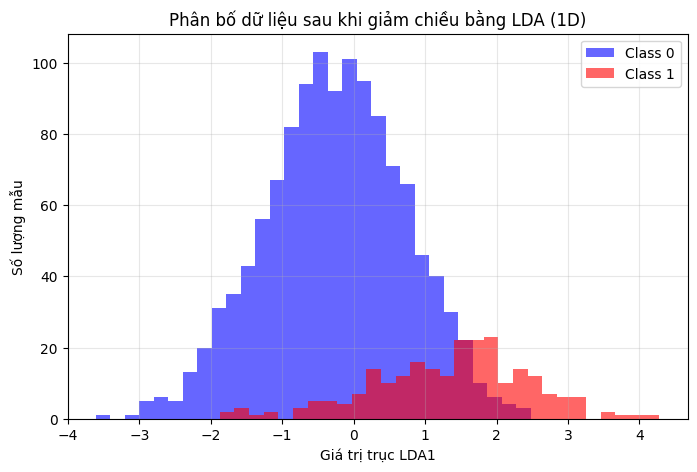

In [26]:
plt.figure(figsize=(8, 5))

plt.hist(X_lda[y == 0], bins=30, alpha=0.6, color='blue', label='Class 0')
plt.hist(X_lda[y == 1], bins=30, alpha=0.6, color='red', label='Class 1')

plt.title('Phân bố dữ liệu sau khi giảm chiều bằng LDA (1D)')
plt.xlabel('Giá trị trục LDA1')
plt.ylabel('Số lượng mẫu')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Xem lượng thông tin được bảo tồn

In [27]:
explained_var_ratio = lda.explained_variance_ratio_
print("Phương sai giải thích của từng thành phần LDA:", explained_var_ratio)
print("Tổng lượng thông tin được bảo tồn:", explained_var_ratio.sum())


Phương sai giải thích của từng thành phần LDA: [1.]
Tổng lượng thông tin được bảo tồn: 1.0


Giải thích:

Ở đây LDA chỉ cho còn lại 1 cột duy nhất do chỉ có 2 class (`0` và `1`) nên LDA bằng 1 cho thấy dữ liệu `100%` khả năng phân biệt giữa 2 lớp (tức toàn bộ dữ liệu ban đầu được nén vào trong 1 cột duy nhất). Do đó phương sai giữa các lớp / tổng phương sai = 1

Hình trực quan:
- Hai lớp vẫn có sự chồng lấn tương đối một phần vì mất cân bằng về dữ liệu.
- Dữ liệu chồng lấn nhiều dù cho phương sai, thông tin bảo tồn nhiều nhưng dữ liệu ban đầu vẫn chưa phân biệt đủ mạnh (do bản thân 2 lớp không khác nhau nhiều).

## So sánh các phương pháp giảm chiều

**Về phương pháp phân tích:**
| Tiêu chí        | PCA (Principal Component Analysis)              | LDA (Linear Discriminant Analysis)                          |
| --------------- | ----------------------------------------------- | ----------------------------------------------------------- |
| Mục tiêu        | Giảm chiều dữ liệu **theo phương sai lớn nhất** | Giảm chiều dữ liệu **theo khả năng phân biệt giữa các lớp** |
| Loại học        | Không giám sát (unsupervised)                   | Có giám sát (supervised)                                    |
| Dữ liệu yêu cầu | Không cần nhãn                                  | Cần nhãn lớp                                                |
| Kết quả chính   | Thành phần chính (PCs)                          | Trục phân biệt (Discriminant axis)                          |
| Số chiều tối đa | ≤ số đặc trưng                                  | ≤ (số lớp - 1)                                              |


**Về kết quả thực nghiệm**

Sử dụng PCA trên dữ liệu ban đầu đã chuẩn hóa:

PC1: 0.1957 (0.1957 tích lũy)
PC2: 0.0740 (0.2698 tích lũy)
PC3: 0.0510 (0.3208 tích lũy)
PC4: 0.0504 (0.3711 tích lũy)
PC5: 0.0474 (0.4185 tích lũy)
PC6: 0.0450 (0.4636 tích lũy)

Nhận xét: Phương sai tích lũy sau 6 trường PCA chỉ đạt 0.46, vẫn còn tương đối thấp do một số vấn đề về dữ liệu bị pha loãng sau khi dùng One Hot Encode, khiến cho PCA kém hiệu quả.

Sử dụng PCA trên dữ liệu liên tục đã được chuẩn hóa:

PC1: 0.2869 (0.2869 tích lũy)
PC2: 0.1179 (0.4048 tích lũy)
PC3: 0.0763 (0.4811 tích lũy)
PC4: 0.0752 (0.5563 tích lũy)
PC5: 0.0721 (0.6284 tích lũy)
PC6: 0.0709 (0.6992 tích lũy)

Sau khi sử dụng giảm chiều cho dữ liệu liên tục thì phương sai có phần tăng đáng kể từ `~42%` lên đến `~70%`, giữ lại được nhiều thông tin hơn. Tuy nhiên phương án này không phản ánh được toàn bộ tập dữ liệu ban đầu, do đây chỉ là một trong 2 phần của dữ liệu.

Sử dụng LDA trên dữ liệu ban đầu đã chuẩn hóa:

Ở đây LDA chỉ cho còn lại 1 cột duy nhất do chỉ có 2 class (`0` và `1`) nên LDA bằng 1 cho thấy dữ liệu `100%` khả năng phân biệt giữa 2 lớp (tức toàn bộ dữ liệu ban đầu được nén vào trong 1 cột duy nhất). Do đó phương sai giữa các lớp / tổng phương sai = 1

Hình trực quan:
- Hai lớp vẫn có sự chồng lấn tương đối một phần vì mất cân bằng về dữ liệu.
- Dữ liệu chồng lấn nhiều dù cho phương sai, thông tin bảo tồn nhiều nhưng dữ liệu ban đầu vẫn chưa phân biệt đủ mạnh (do bản thân 2 lớp không khác nhau nhiều).

**Về thực nghiệm với các mô hình sẽ được thực hiện sau**